# Several quite different sections

In [108]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
from DLC_for_WBFM.utils.projects.utils_neuron_names import int2name_neuron
from collections import defaultdict
from tqdm.auto import tqdm
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['font.size'] = 24

from DLC_for_WBFM.utils.performance.comparing_ground_truth import TRACKED_IND
from tqdm.auto import tqdm
from DLC_for_WBFM.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from DLC_for_WBFM.utils.pipeline.long_range_matching import initialize_worm_object
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Explain workflow via screenshots

## Run on command line:

```bash
conda activate torch

cd Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/

python gui/progress_gui.py --project_path /home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml
```

# Grid plot of selected (good) neurons

In [98]:
from DLC_for_WBFM.utils.visualization.plot_traces import make_grid_plot_from_project
tracked_names = [int2name_neuron(i) for i in TRACKED_IND]

Found 55 neurons; shaping to grid of shape (11, 5)


  0%|          | 0/55 [00:00<?, ?it/s]

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


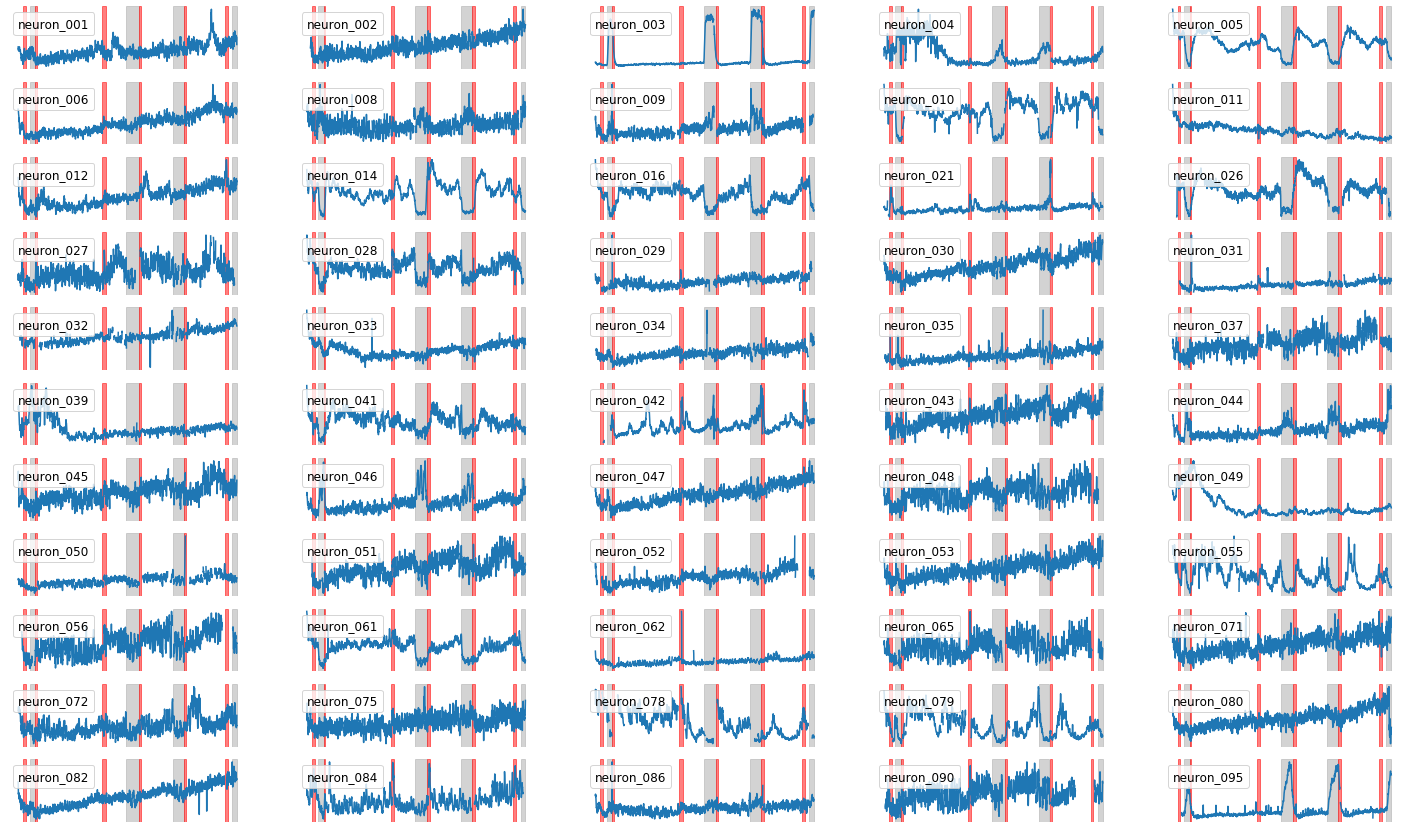

In [101]:
mpl.rcParams['font.size'] = 12

make_grid_plot_from_project(project_data, 'ratio', 'integration', neuron_names_to_plot=tracked_names, to_save=False)
plt.savefig("plots/grid_plot_subset.png")

# GUI to look in more detail at neurons

## Run on command line:

```bash
conda activate torch

cd Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/

python gui/progress_gui.py --project_path /home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml
```

# GUI demo for annotation

## Run on command line:

```bash
conda activate torch

cd Current_work/repos/dlc_for_wbfm/DLC_for_WBFM/

python gui/progress_gui.py --project_path /home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml
```

# Example errors

## TODO: find frames and neurons which show the following errors:

1. Track broken by segmentation error - __neuron_017__ at t=258
2. Neighbor jump - __neuron_054__ at t~625
3. Messy segmentation in VNC
4. Problems due to turns - __neuron_051__ at the beginning

# Accuracy of leifer method (fdnc)

In [14]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/home/charles/dlc_stacks/worm3-tracklet_wiggle 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [15]:
from DLC_for_WBFM.utils.performance.comparing_ground_truth import calc_all_dist, calc_accuracy, plot_histogram_at_likelihood_thresh


In [16]:
track_cfg = project_data.project_config.get_tracking_config()
fname = track_cfg.resolve_relative_path_from_config('final_3d_tracks_df')

df_tracks = pd.read_hdf(fname)
df_tracks.replace(0.0, np.nan, inplace=True)

In [17]:
# From different project, but same templates
# ... note that I manually moved this off the cluster
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-multiple_templates/3-tracking/postprocessing/leifer_tracks.h5"
fname = "/home/charles/dlc_stacks/worm3-multiple_templates/3-tracking/postprocessing/leifer_tracks.h5"

df_leifer = pd.read_hdf(fname)
df_leifer.replace(0.0, np.nan, inplace=True)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

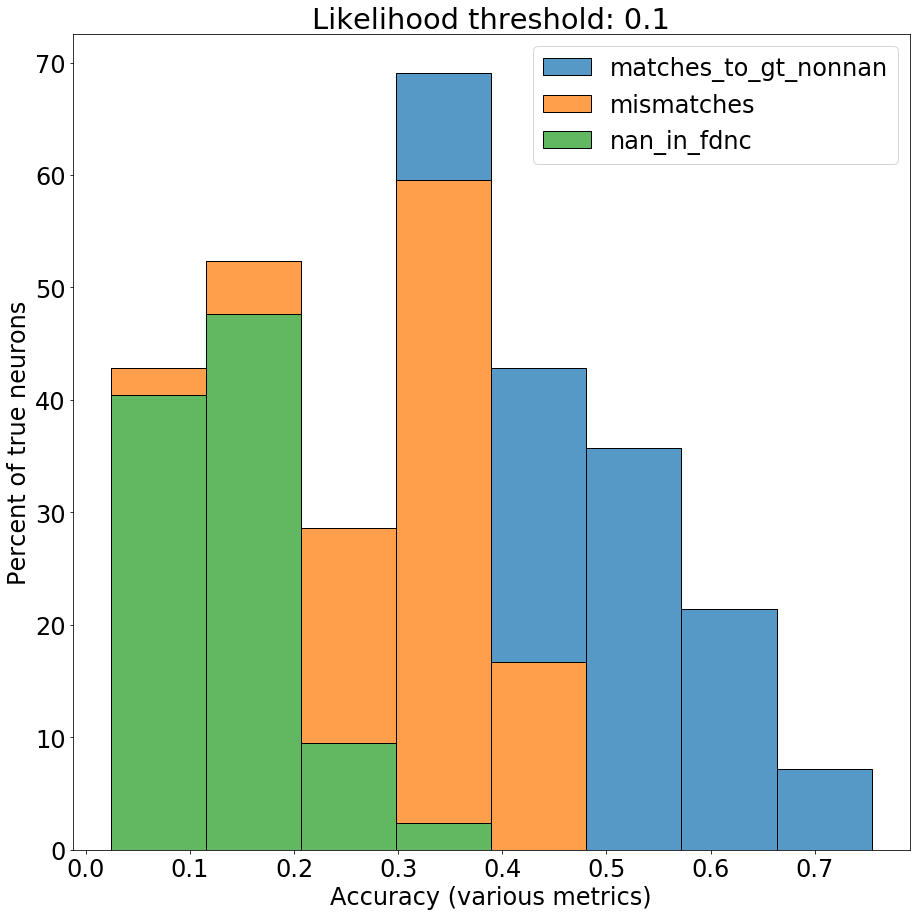

In [91]:
plt.figure(figsize=(15,15))
dat = plot_histogram_at_likelihood_thresh(df_tracks, df_leifer, 0.1)
plt.savefig("plots/fdnc_ground_truth_histogram.png")

In [83]:
tmp = pd.concat(dat, axis=1)

tmp['matches_plus_mismatches'] = tmp['mismatches'] + tmp['matches_to_gt_nonnan']
tmp['ones'] = 1.0 # Will be plotted over, visually
tmp = tmp.sort_values('matches_to_gt_nonnan')
tmp.head()

,matches_to_gt_nonnan,mismatches,nan_in_fdnc,mismatches_plus_nan,ones,matches,nan,matches_plus_mismatches
neuron_062,0.359527,0.270667,0.368667,0.639333,1.0,1.0,0.639333,0.630194
neuron_013,0.362451,0.266000,0.122667,0.388667,1.0,1.0,0.388667,0.628451
neuron_006,0.383690,0.336667,0.279333,0.616000,1.0,1.0,0.616000,0.720357
neuron_026,0.386667,0.334000,0.246667,0.580667,1.0,1.0,0.580667,0.720667
neuron_002,0.394558,0.449333,0.146667,0.596000,1.0,1.0,0.596000,0.843891


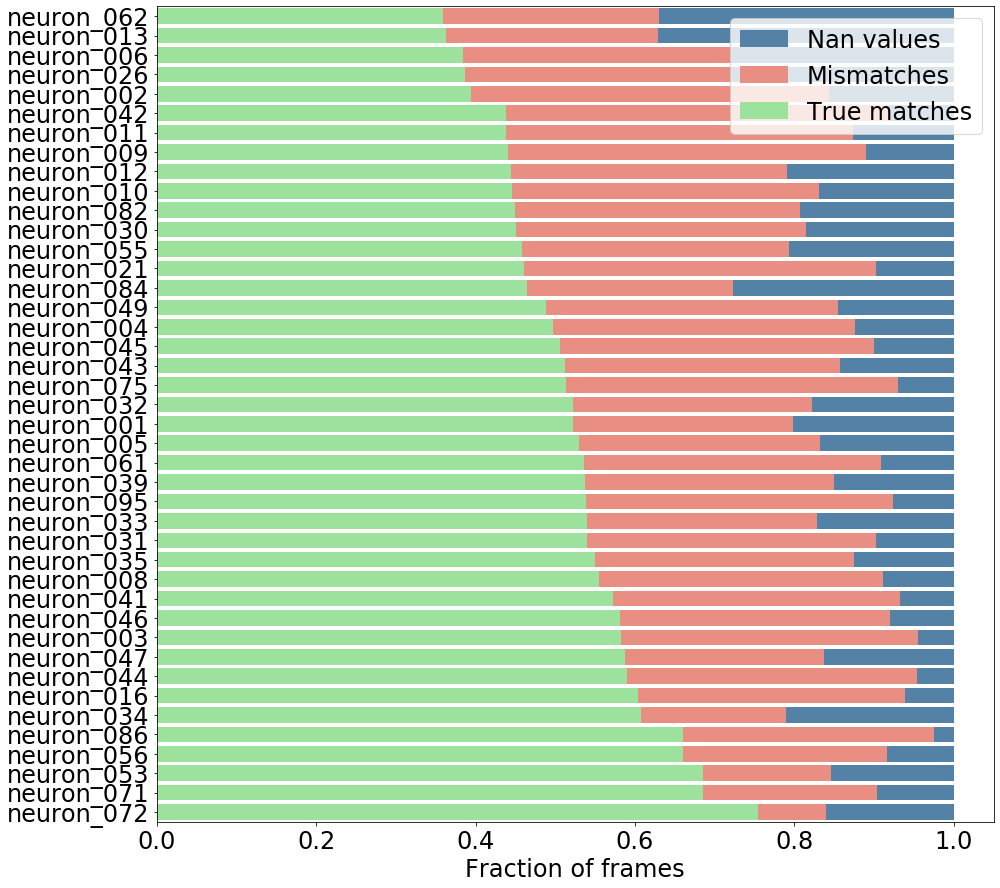

In [89]:
plt.figure(figsize=(15,15))

sns.barplot(data=tmp, y=tmp.index, x="ones", color='steelblue', label="Nan values")
sns.barplot(data=tmp, y=tmp.index, x="matches_plus_mismatches", color='salmon', label="Mismatches")
sns.barplot(data=tmp, y=tmp.index, x="matches_to_gt_nonnan", color='lightgreen', label="True matches")
plt.xlabel("Fraction of frames")
plt.legend()

plt.savefig("plots/fdnc_ground_truth.png")

## fdnc with different thresholds

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

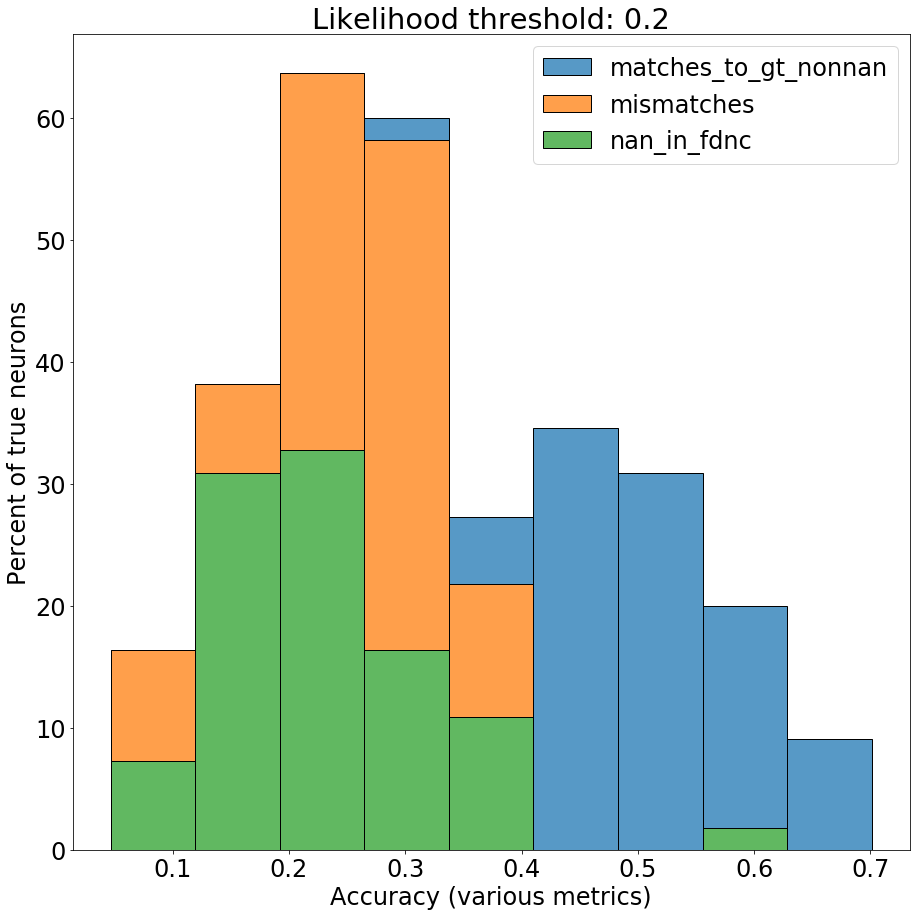

In [120]:
plt.figure(figsize=(15,15))
dat = plot_histogram_at_likelihood_thresh(df_tracks, df_leifer, 0.2)


In [121]:
tmp = pd.concat(dat, axis=1)

tmp['matches_plus_mismatches'] = tmp['mismatches'] + tmp['matches_to_gt_nonnan']
tmp['ones'] = 1.0 # Will be plotted over, visually
tmp = tmp.sort_values('matches_to_gt_nonnan')
tmp.head()

,matches_to_gt_nonnan,mismatches,nan_in_fdnc,matches_plus_mismatches,ones
neuron_062,0.267733,0.160667,0.568667,0.428400,1.0
neuron_006,0.338904,0.255333,0.405333,0.594237,1.0
neuron_026,0.357037,0.246000,0.367333,0.603037,1.0
neuron_002,0.380272,0.314667,0.297333,0.694939,1.0
neuron_055,0.417850,0.226667,0.354000,0.644517,1.0


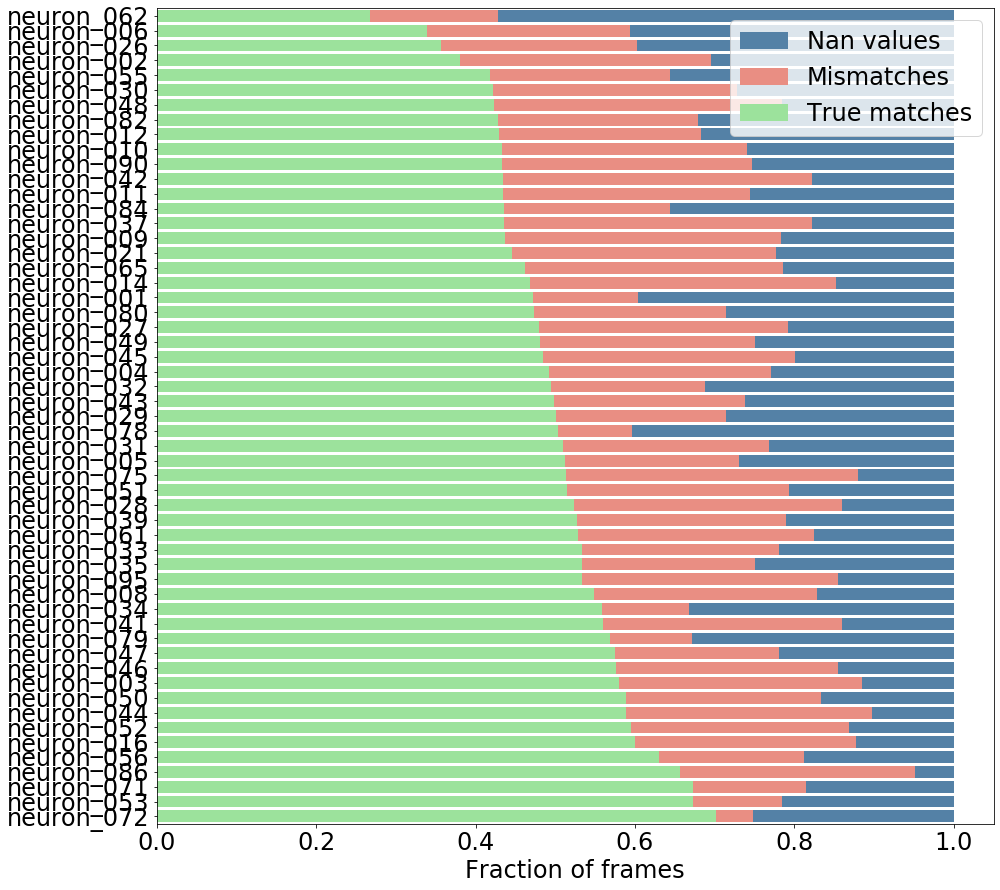

In [122]:
plt.figure(figsize=(15,15))

sns.barplot(data=tmp, y=tmp.index, x="ones", color='steelblue', label="Nan values")
sns.barplot(data=tmp, y=tmp.index, x="matches_plus_mismatches", color='salmon', label="Mismatches")
sns.barplot(data=tmp, y=tmp.index, x="matches_to_gt_nonnan", color='lightgreen', label="True matches")
plt.xlabel("Fraction of frames")
plt.legend()

# Similar postures across time

In [103]:
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [104]:
df_tracklets = project_data.df_all_tracklets
segmentation_metadata = project_data.segmentation_metadata
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

frame_pair_options = all_matches[(0, 1)].options

In [107]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"
fname_X = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_X_coords.csv"
fname_Y = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_Y_coords.csv"

full_posture = WormFullVideoPosture(fname, fname_X, fname_Y)
reference_posture = WormReferencePosture(0, full_posture)

# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

worm_obj = initialize_worm_object(all_tracklet_names, df_tracklets, raw_clust, segmentation_metadata)

  0%|          | 0/16624 [00:00<?, ?it/s]

In [109]:
indices_to_check = reference_posture.indices_close_to_reference[1:]
indices_to_check = [i for i in indices_to_check if i < len(all_frames)]

In [110]:
all_adjacent_long_range_matches = {}
i_previous = 0
for i_next in tqdm(indices_to_check):
    pair = (i_previous, i_next)
    i_previous = i_next
    anchor_frame = all_frames[pair[0]]
    long_range_frame = all_frames[pair[1]]
    long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame,
                                                 frame_pair_options=frame_pair_options)
    all_adjacent_long_range_matches[pair] = long_range_pair

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [116]:
[m.calc_final_matches() for m in tqdm(all_adjacent_long_range_matches.values())]
project_data.raw_matches.update(all_adjacent_long_range_matches)

  0%|          | 0/196 [00:00<?, ?it/s]

## A pair that is very difficult to judge due to rotated posture

In [113]:
indices_to_check[:10]

[1, 2, 17, 18, 19, 40, 41, 73, 74, 84]

In [117]:
# 
pair = (41, 73)

In [118]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=False);

In [119]:
project_data.napari_of_single_match(pair, rigidly_align_volumetric_images=True);

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

In [123]:
len(all_adjacent_long_range_matches)

196